In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

In [3]:
X,y = make_moons(500,noise=0.1)

In [4]:
X

array([[ 0.06243191, -0.00294574],
       [ 0.07166272,  0.19741872],
       [ 1.19649707, -0.55893277],
       [ 0.85287367, -0.4760752 ],
       [ 0.81630902,  0.7518123 ],
       [-0.97170586,  0.53509396],
       [ 0.84583928,  0.34389096],
       [-0.44232812,  1.0788535 ],
       [-1.07737092,  0.12564961],
       [ 1.16572326, -0.58195496],
       [-0.24977188,  0.94764506],
       [-0.66114227,  0.8684034 ],
       [ 0.24723504,  0.07676938],
       [ 0.98860429,  0.33711458],
       [ 1.00605197,  0.20947168],
       [-0.91908433,  0.53123645],
       [ 1.0278393 ,  0.37428183],
       [-0.53702245,  0.73522126],
       [ 0.64803947,  0.62951615],
       [-0.06223267,  0.45491434],
       [ 0.17065708,  0.11223245],
       [-1.04377318,  0.12535236],
       [ 0.45987815, -0.44651069],
       [-0.03141944,  0.96179   ],
       [-0.91715573,  0.32360346],
       [ 0.0691969 ,  0.35043839],
       [-0.8973212 ,  0.54488577],
       [-0.64518334,  1.13482978],
       [-0.30441927,

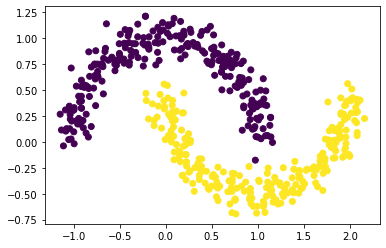

In [5]:
plt.scatter(X[:,0],X[:,1],c=y);

In [6]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc4 = nn.Linear(2,20)
        self.norm4 = nn.LayerNorm(20)
        self.fc3 = nn.Linear(20,40)
        self.fc2 = nn.Linear(40,20)
        self.fc1 = nn.Linear(20,1)
        
        self.relu = nn.ReLU()
        

        
    def forward(self,x):
        u = self.fc4(x)
        u = self.norm4(u)
        z = self.relu(u)
        u = self.fc3(z)
        z = self.relu(u)
        u = self.fc2(z)
        z = self.relu(u)
        u = self.fc1(z)
        z = torch.sigmoid(u)

        return z
        
    def predict(self,A):
        with torch.no_grad():
            output = self.forward(A)
            output.cpu()
            output_ = output.numpy()
            return np.array([0 if x<1/2 else 1 for x in output_])

In [7]:
X_t = torch.FloatTensor(X)
y_t = torch.FloatTensor(y).unsqueeze(1)

In [8]:
X_t.size()

torch.Size([500, 2])

In [9]:
y_t.size()

torch.Size([500, 1])

In [10]:
y_t

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
      

In [11]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X_t,y_t)
dl = DataLoader(dataset = dataset,batch_size=10,
                                      shuffle=True)

In [12]:
net = Net()

In [13]:
next(iter(dl))

[tensor([[ 1.9216, -0.1495],
         [ 0.8667, -0.3888],
         [ 0.7539,  0.5369],
         [ 1.2792, -0.5261],
         [ 2.0152,  0.2754],
         [ 1.9096,  0.0420],
         [-0.5041,  0.8502],
         [ 1.7093, -0.3044],
         [ 0.0517,  0.2374],
         [ 0.5518, -0.4198]]),
 tensor([[1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.]])]

In [14]:
x_b,y_b = next(iter(dl))

In [15]:
net(x_b)

tensor([[0.4718],
        [0.4918],
        [0.4749],
        [0.4777],
        [0.4987],
        [0.4718],
        [0.4833],
        [0.4832],
        [0.4686],
        [0.5016]], grad_fn=<SigmoidBackward0>)

In [16]:
net(x_b).shape

torch.Size([10, 1])

In [17]:
y_b.shape

torch.Size([10, 1])

In [18]:
loss_fn = nn.BCELoss()
optimizer = Adam(net.parameters(),lr = 0.01)

In [19]:
loss = loss_fn(net(x_b),y_b)
loss

tensor(0.6932, grad_fn=<BinaryCrossEntropyBackward0>)

In [20]:
net.fc1.weight

Parameter containing:
tensor([[ 0.1960, -0.1938,  0.0941, -0.0183,  0.0550, -0.2001,  0.0505, -0.2213,
         -0.0922, -0.1324,  0.1613, -0.1346, -0.1688, -0.0376,  0.1792, -0.1490,
          0.2137, -0.1231,  0.1456, -0.0169]], requires_grad=True)

In [21]:
loss.backward()

In [22]:
net.fc1.weight.grad

tensor([[ 2.9256e-02,  2.0691e-03, -3.8734e-03,  1.7170e-04,  0.0000e+00,
          0.0000e+00,  4.1068e-03,  0.0000e+00, -1.5609e-05,  0.0000e+00,
          2.2701e-02,  0.0000e+00, -1.0671e-03,  8.6506e-03,  0.0000e+00,
         -8.6417e-03,  0.0000e+00,  8.6349e-03,  3.9948e-02,  4.1463e-02]])

In [23]:
optimizer.step()

In [24]:
net.fc1.weight

Parameter containing:
tensor([[ 0.1860, -0.2038,  0.1041, -0.0283,  0.0550, -0.2001,  0.0405, -0.2213,
         -0.0822, -0.1324,  0.1513, -0.1346, -0.1588, -0.0476,  0.1792, -0.1390,
          0.2137, -0.1331,  0.1356, -0.0269]], requires_grad=True)

In [25]:
losses = []

for epoch in range(100):
    aggr_loss = 0.0
    for points,labels in dl:
        
        output = net(points)

        loss = loss_fn(output,labels)
        
        aggr_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step() 
    
    if epoch % 10 == 0:
        print(aggr_loss.item())   
    losses.append(aggr_loss.item())

16.22542381286621
0.18867088854312897
0.7458800673484802
0.3438734710216522
1.3839861154556274
0.27378007769584656
0.3036242723464966
0.07304561883211136
2.522505521774292
0.14259250462055206


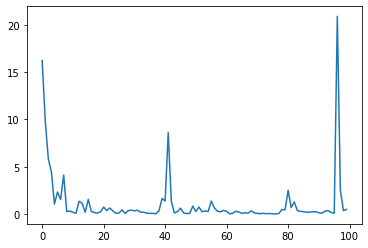

In [26]:
plt.plot(losses);

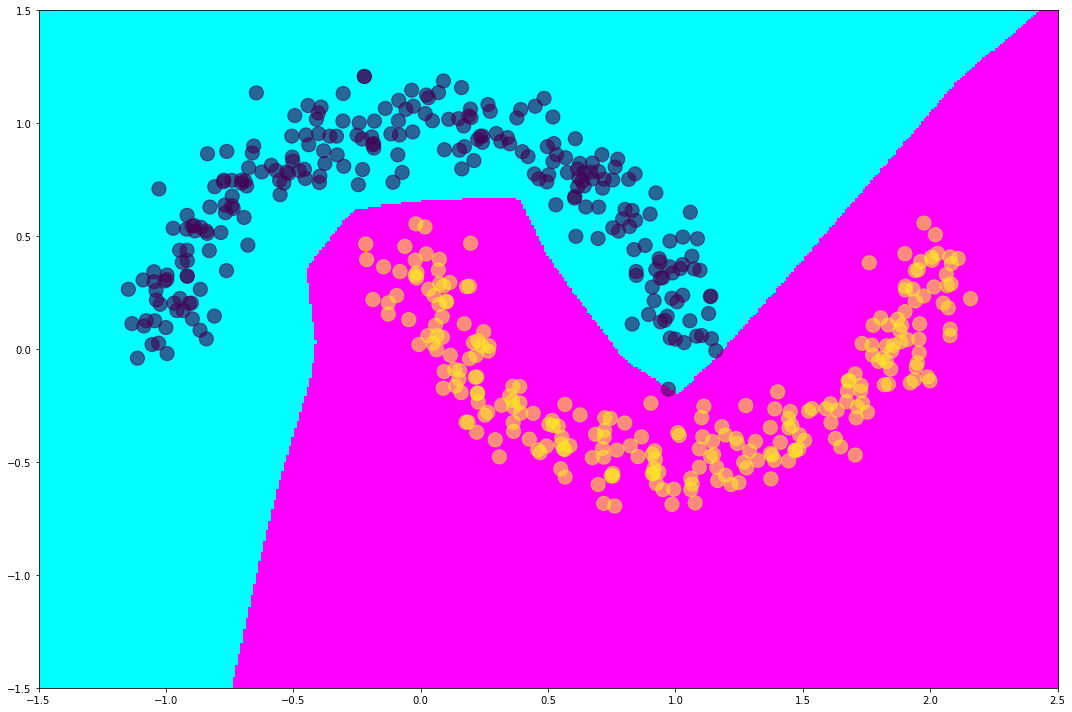

In [27]:
b0_min,b0_max = -1.5,2.5
b1_min, b1_max = -1.5, 1.5

xx,yy = np.meshgrid(np.arange(b0_min,b0_max,0.01),np.arange(b1_min,b1_max,0.01))

A = np.vstack((xx.ravel(), yy.ravel())).T

plt.figure(figsize=(15,10))

A_p = torch.from_numpy(A.astype(np.float32))
Z = net.predict(A_p)

Z = Z.reshape(xx.shape)
image = plt.imshow(Z, interpolation='nearest',
                       extent=(b0_min, b0_max, b1_min, b1_max),
                        aspect='auto', origin='lower', cmap='cool')

plt.scatter(X[:,0],X[:,1],c=y.reshape(1,-1)[0],s=200,alpha=0.6)
plt.tight_layout()
plt.show()

In [28]:
x = torch.tensor([1.,0.])
u = nn.Linear(2,5)(x)

In [29]:
u

tensor([ 0.4157,  0.6720, -0.2150, -1.3561, -0.4798], grad_fn=<AddBackward0>)

In [30]:
print(u.mean())
print(u.std())

tensor(-0.1926, grad_fn=<MeanBackward0>)
tensor(0.7991, grad_fn=<StdBackward0>)


In [31]:
u = nn.LayerNorm(5)(u)

In [32]:
print(net.norm4.weight)
print(net.norm4.bias)

Parameter containing:
tensor([1.0013, 0.3270, 1.2899, 1.1298, 1.1430, 0.5704, 1.7065, 0.2665, 0.9370,
        0.4297, 1.2520, 2.5333, 1.9817, 1.1279, 1.1097, 3.3019, 0.6274, 0.8360,
        1.8031, 2.4057], requires_grad=True)
Parameter containing:
tensor([-0.4631, -0.6205, -0.0661, -0.2786, -0.2998, -0.3453, -0.3050, -0.6983,
        -0.4557, -0.6576, -0.2639,  0.3502,  0.2141, -0.2795, -0.2063,  0.2819,
        -0.6074, -0.3505,  0.0906,  0.3474], requires_grad=True)


In [33]:
print(net.norm4.weight)
print(net.norm4.bias)

Parameter containing:
tensor([1.0013, 0.3270, 1.2899, 1.1298, 1.1430, 0.5704, 1.7065, 0.2665, 0.9370,
        0.4297, 1.2520, 2.5333, 1.9817, 1.1279, 1.1097, 3.3019, 0.6274, 0.8360,
        1.8031, 2.4057], requires_grad=True)
Parameter containing:
tensor([-0.4631, -0.6205, -0.0661, -0.2786, -0.2998, -0.3453, -0.3050, -0.6983,
        -0.4557, -0.6576, -0.2639,  0.3502,  0.2141, -0.2795, -0.2063,  0.2819,
        -0.6074, -0.3505,  0.0906,  0.3474], requires_grad=True)


In [34]:
x = torch.rand(3,5)
x

tensor([[0.2000, 0.6041, 0.1377, 0.1178, 0.8099],
        [0.5109, 0.2365, 0.7772, 0.2830, 0.4123],
        [0.9765, 0.4331, 0.9492, 0.1729, 0.6566]])

In [35]:
v = nn.Dropout(0.2)(x)
v

tensor([[0.2500, 0.7551, 0.1721, 0.1473, 1.0124],
        [0.6387, 0.2956, 0.9715, 0.3537, 0.5154],
        [1.2207, 0.5414, 0.0000, 0.2161, 0.8208]])

In [36]:
(0.8) * v

tensor([[0.2000, 0.6041, 0.1377, 0.1178, 0.8099],
        [0.5109, 0.2365, 0.7772, 0.2830, 0.4123],
        [0.9765, 0.4331, 0.0000, 0.1729, 0.6566]])